In [ ]:
import pandas as pd
# Read in data and display first 5 rows
#for random forest , KNN , extratrees, logistic regression
pd.set_option('display.max_columns', None)
features = pd.read_csv('/content/drive/MyDrive/tor_nontor.csv')
features.head(5)

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,100215.0,37628,2.132390e+11,443,6,452,0.0,4424.778761,452.0,0.0,452,452,452.0,0.0,452,452,0.0,0.0,0,0,0,0,0,0,0,0,0,0,TOR
1,100215.0,60031,1.951548e+10,443,6,296,0.0,6756.756757,296.0,0.0,296,296,0.0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,TOR
2,37971498.0,443,1.002150e+05,59708,6,563,0.0,3552.397869,563.0,0.0,563,563,0.0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,TOR
3,100215.0,59717,3.797150e+07,443,6,158,0.0,12658.227850,158.0,0.0,158,158,158.0,0.0,158,158,0.0,0.0,0,0,0,0,0,0,0,0,0,0,TOR
4,100215.0,59279,2.132390e+11,443,6,716,0.0,2793.296089,716.0,0.0,716,716,716.0,0.0,716,716,0.0,0.0,0,0,0,0,0,0,0,0,0,0,TOR


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16144 entries, 0 to 16143
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Source IP          16144 non-null  float64
 1    Source Port       16144 non-null  int64  
 2    Destination IP    16144 non-null  float64
 3    Destination Port  16144 non-null  int64  
 4    Protocol          16144 non-null  int64  
 5    Flow Duration     16144 non-null  int64  
 6    Flow Bytes/s      16144 non-null  float64
 7    Flow Packets/s    16144 non-null  float64
 8    Flow IAT Mean     16144 non-null  float64
 9    Flow IAT Std      16144 non-null  float64
 10   Flow IAT Max      16144 non-null  int64  
 11   Flow IAT Min      16144 non-null  int64  
 12  Fwd IAT Mean       16144 non-null  float64
 13   Fwd IAT Std       16144 non-null  float64
 14   Fwd IAT Max       16144 non-null  int64  
 15   Fwd IAT Min       16144 non-null  int64  
 16  Bwd IAT Mean       161

<Axes: >

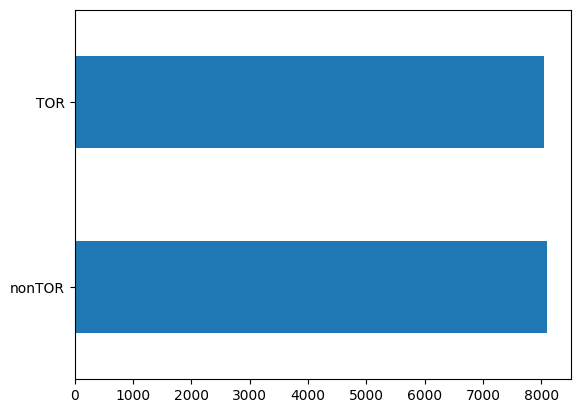

In [ ]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()

features['label'].value_counts().plot(kind='barh')


In [ ]:

features.corr()

<ipython-input-53-83b1bbe52583>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  features.corr()


,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Source IP,1.000000,0.182163,0.010694,-0.199502,NaN,-0.482887,-0.066860,-0.010319,0.065725,0.028622,-0.123254,0.015214,0.023714,-0.037996,-0.132995,0.043453,-0.061338,-0.147143,-0.206676,0.000662,-0.059132,NaN,-0.059132,-0.059132,-0.108389,NaN,-0.108389,-0.108389
Source Port,0.182163,1.000000,0.165976,-0.873716,NaN,-0.324079,-0.016503,-0.125730,0.105925,0.093076,0.137446,0.069597,0.096356,0.107489,0.132566,0.043206,0.030385,0.075530,0.092391,0.000177,0.021778,NaN,0.021778,0.021778,0.067456,NaN,0.067456,0.067456
Destination IP,0.010694,0.165976,1.000000,-0.122540,NaN,-0.299342,-0.013741,0.057668,0.054825,0.010191,-0.020066,0.060258,0.012929,-0.015687,-0.038998,0.023682,0.026035,-0.036259,-0.043766,0.044277,-0.017789,NaN,-0.017789,-0.017789,-0.023569,NaN,-0.023569,-0.023569
Destination Port,-0.199502,-0.873716,-0.122540,1.000000,NaN,0.295200,0.014256,0.139553,-0.111885,-0.097197,-0.141634,-0.075076,-0.109228,-0.113698,-0.141275,-0.055189,-0.025894,-0.079653,-0.091641,0.005614,-0.033473,NaN,-0.033473,-0.033473,-0.072276,NaN,-0.072276,-0.072276
Protocol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flow Duration,-0.482887,-0.324079,-0.299342,0.295200,NaN,1.000000,-0.013393,-0.090442,0.065129,0.167605,0.314861,-0.046075,0.129134,0.192001,0.329334,0.033929,0.127384,0.208429,0.336668,0.048435,0.115065,NaN,0.115065,0.115065,0.190024,NaN,0.190024,0.190024
Flow Bytes/s,-0.066860,-0.016503,-0.013741,0.014256,NaN,-0.013393,1.000000,0.063486,-0.038078,-0.036494,-0.046363,-0.021119,-0.034124,-0.035298,-0.042528,-0.016998,-0.025369,-0.030983,-0.035163,-0.013201,-0.013596,NaN,-0.013596,-0.013596,-0.023611,NaN,-0.023611,-0.023611
Flow Packets/s,-0.010319,-0.125730,0.057668,0.139553,NaN,-0.090442,0.063486,1.000000,-0.028738,-0.028447,-0.045119,-0.015749,-0.026019,-0.028149,-0.042601,-0.012724,-0.019606,-0.025723,-0.038539,-0.009899,-0.010928,NaN,-0.010928,-0.010928,-0.018731,NaN,-0.018731,-0.018731
Flow IAT Mean,0.065725,0.105925,0.054825,-0.111885,NaN,0.065129,-0.038078,-0.028738,1.000000,0.728029,0.631217,0.652425,0.859441,0.525561,0.559569,0.657036,0.390367,0.136064,0.189508,0.364894,0.092391,NaN,0.092391,0.092391,0.215401,NaN,0.215401,0.215401
Flow IAT Std,0.028622,0.093076,0.010191,-0.097197,NaN,0.167605,-0.036494,-0.028447,0.728029,1.000000,0.783953,-0.016234,0.730321,0.805135,0.704509,0.300302,0.591089,0.392556,0.459003,0.474776,0.157161,NaN,0.157161,0.157161,0.458031,NaN,0.458031,0.458031


<ipython-input-57-be5c4e872a10>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(features.corr(), annot = True)


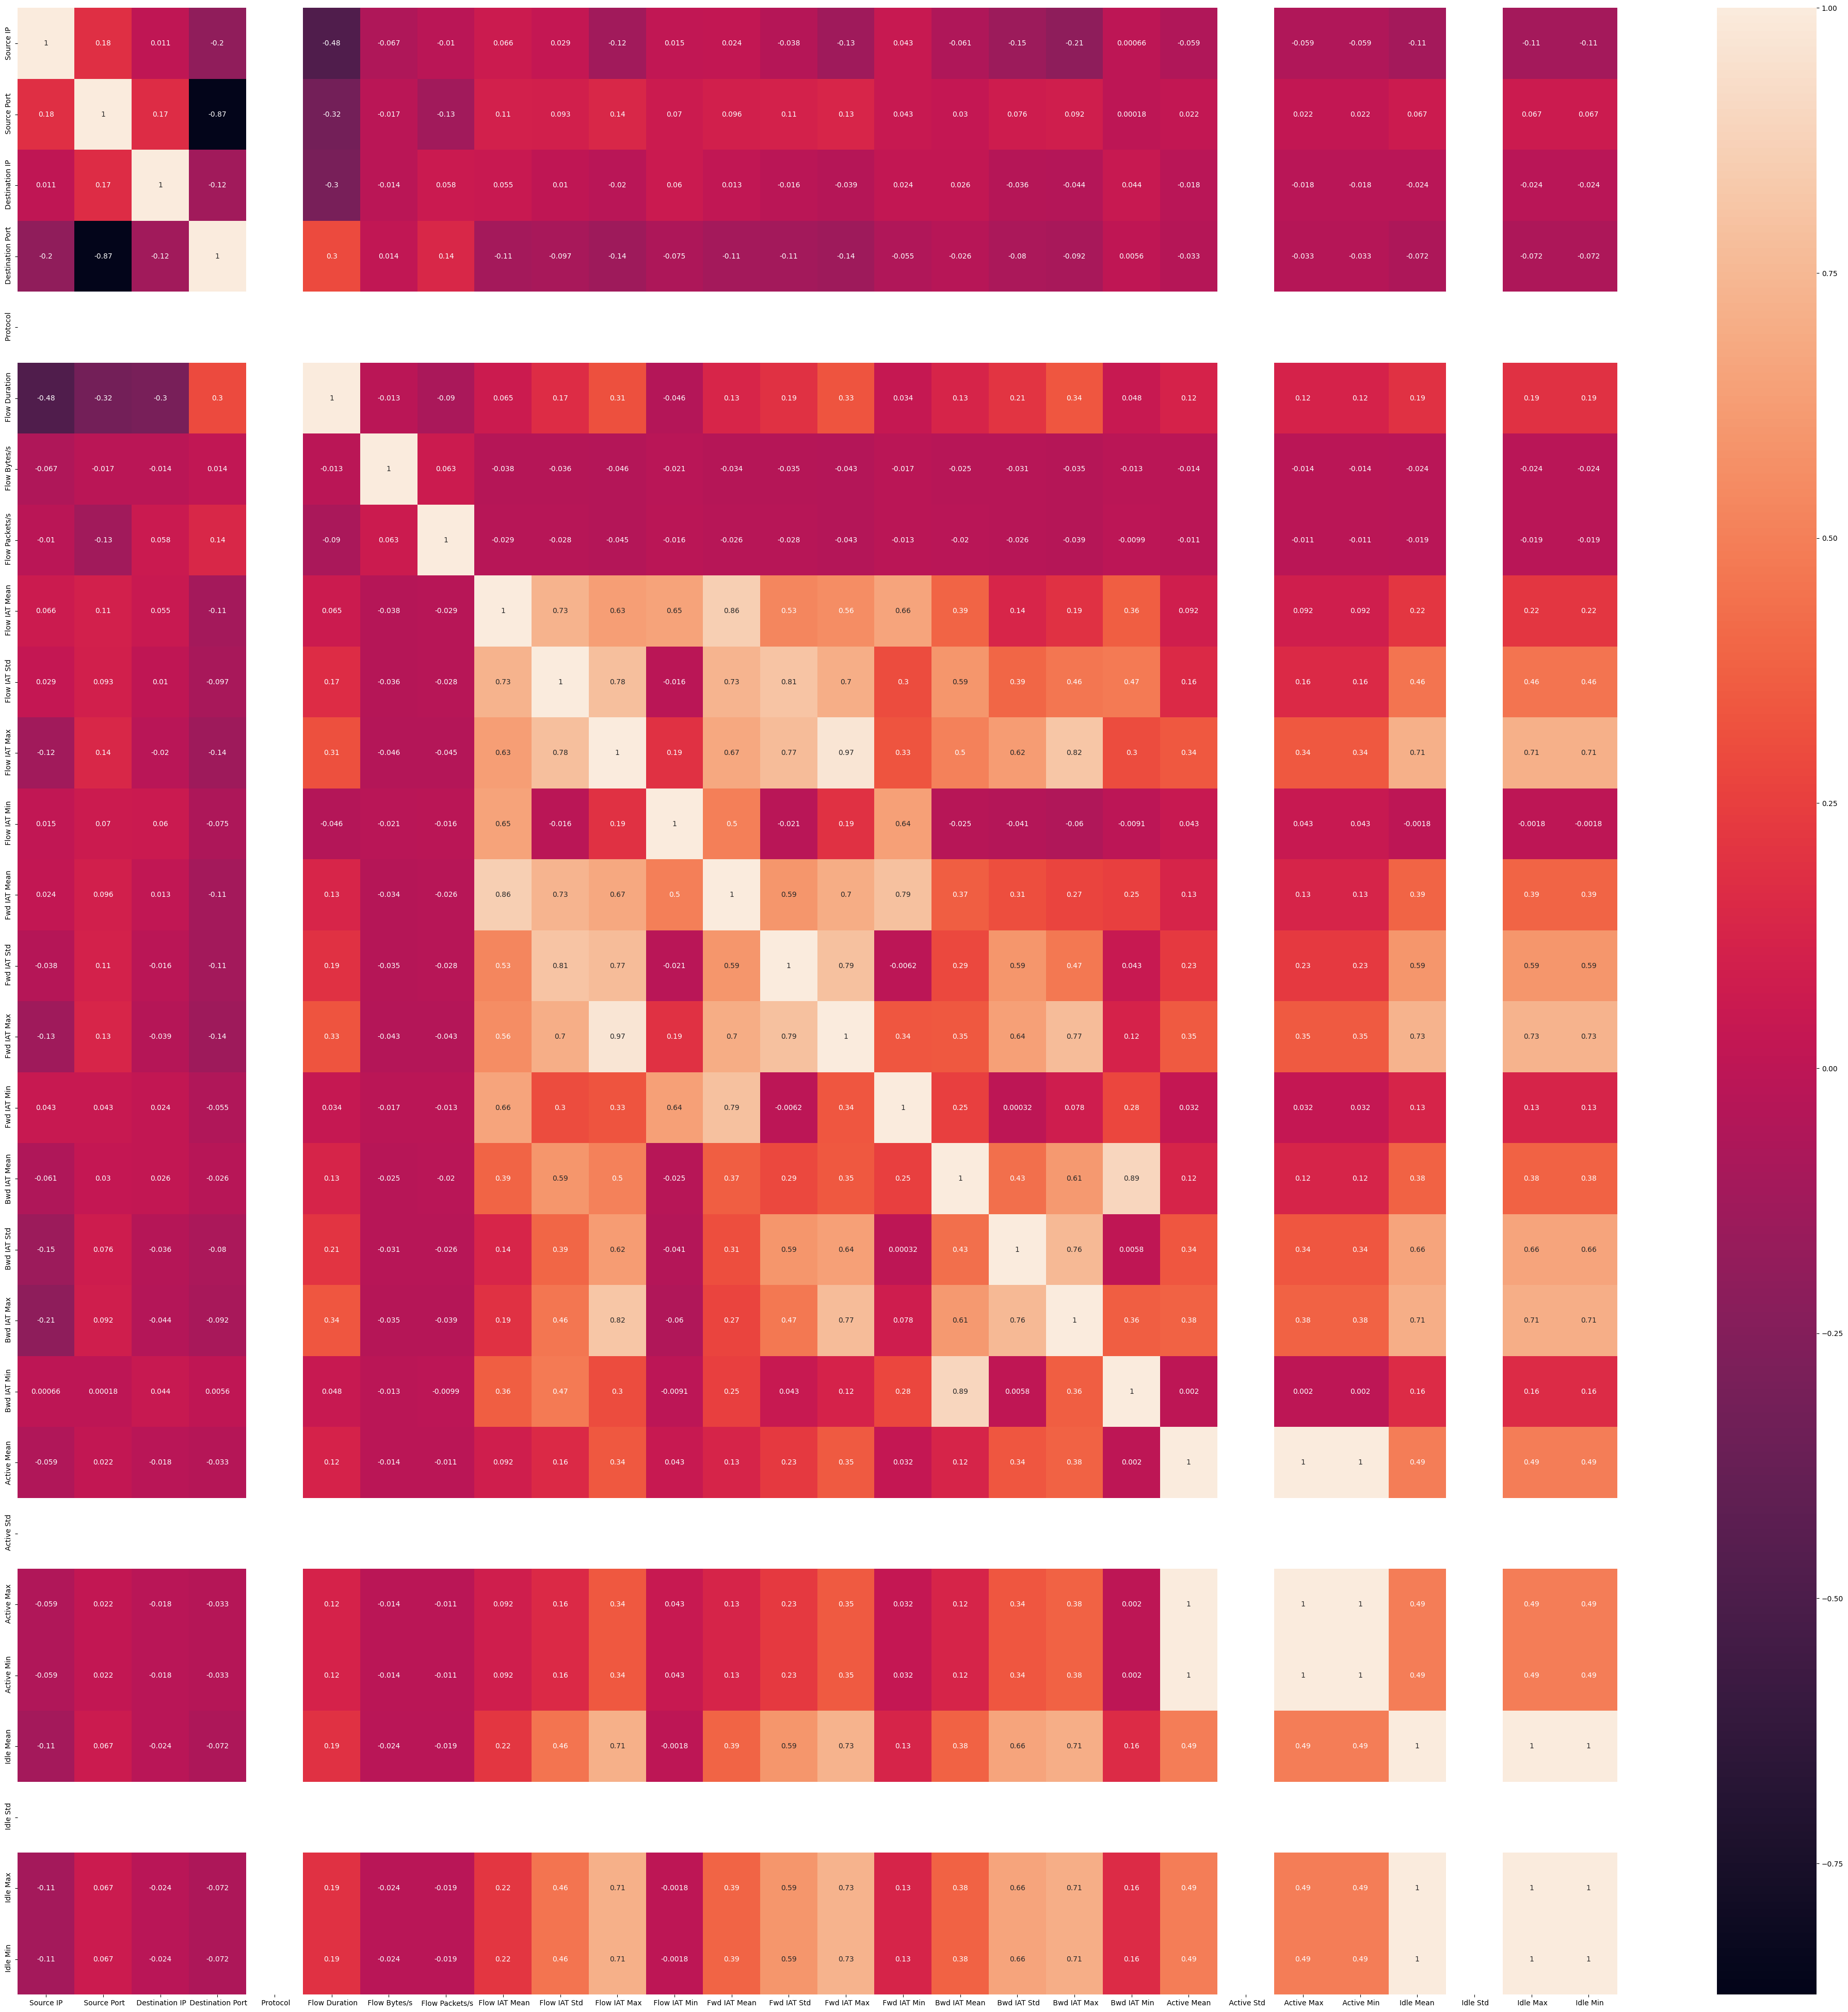

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (50,50)
sns.heatmap(features.corr(), annot = True)
plt.show()

In [ ]:
import numpy as np
# Labels are the values we want to predict
labels = np.array(features['label'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('label', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [ ]:
print('The shape of our features is:', features.shape)


The shape of our features is: (16144, 28)


In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (12108, 28)
Training Labels Shape: (12108,)
Testing Features Shape: (4036, 28)
Testing Labels Shape: (4036,)


In [ ]:

#from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score
import lightgbm as lgb
#model = KNeighborsClassifier(n_neighbors = 1)
#model.fit(train_features,train_labels)
k_fold=KFold(n_splits=3)
model=RandomForestClassifier(max_depth=2, random_state=0)
model1 = KNeighborsClassifier(n_neighbors=3)
model2 = ExtraTreeClassifier(random_state=0)
model4= lgb.LGBMClassifier()
model.fit(train_features,train_labels)
model1.fit(train_features,train_labels)
model2.fit(train_features,train_labels)
model3=LogisticRegression(random_state=0).fit(train_features,train_labels)
model4.fit(train_features,train_labels)
scores=cross_val_score(model,train_features,train_labels,cv=k_fold)
scores1=cross_val_score(model1,train_features,train_labels,cv=k_fold)
scores2=cross_val_score(model2,train_features,train_labels,cv=k_fold)
scores3=cross_val_score(model3,train_features,train_labels,cv=k_fold)
scores4=cross_val_score(model4,train_features,train_labels,cv=k_fold)
print(scores)
print(scores.mean())
print(scores1)
print(scores1.mean())
print(scores2)
print(scores2.mean())
print(scores3)
print(scores3.mean())
print(scores4)
print(scores4.mean())

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.98339941 0.98909812 0.98364718]
0.9853815659068385
[0.99777007 0.99826561 0.99801784]
0.9980178394449949
[0.99405352 0.99479683 0.99777007]
0.9955401387512389
[0.97026759 0.97497522 0.97373637]
0.9729930624380575
[0.99975223 0.99950446 0.99975223]
0.9996696399074992


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print()
predictions_rf = model.predict(test_features)
predictions_knn = model1.predict(test_features)
predictions_et = model2.predict(test_features)
predictions_lr = model3.predict(test_features)
predictions_lightgbm = model4.predict(test_features)
# using metrics module for accuracy calculation
print("Accuracy for Random forest model: ", accuracy_score(test_labels, predictions_rf))
print("F1 score of the random forest model: ",f1_score(test_labels, predictions_rf, average="macro"))
print("Precision score of the random forest model: ",precision_score(test_labels, predictions_rf, average="macro"))
print("Recall score of the random forest model", recall_score(test_labels, predictions_rf, average="macro"))

print("Accuracy for KNN model: ", accuracy_score(test_labels, predictions_knn))
print("F1 score of the KNN model: ",f1_score(test_labels, predictions_knn, average="macro"))
print("Precision score of the KNN model: ",precision_score(test_labels, predictions_knn, average="macro"))
print("Recall score of the KNN model", recall_score(test_labels, predictions_knn, average="macro"))

print("Accuracy for Eextra trees model: ", accuracy_score(test_labels, predictions_et))
print("F1 score of the extra trees model: ",f1_score(test_labels, predictions_et, average="macro"))
print("Precision score of the extra trees model: ",precision_score(test_labels, predictions_et, average="macro"))
print("Recall score of the extra trees model", recall_score(test_labels, predictions_et, average="macro"))

print("Accuracy for logistic regression model: ", accuracy_score(test_labels, predictions_lr))
print("F1 score of the logistic regression model: ",f1_score(test_labels, predictions_lr, average="macro"))
print("Precision score of the logistic regression model: ",precision_score(test_labels, predictions_lr, average="macro"))
print("Recall score of the logistic regression model", recall_score(test_labels, predictions_lr, average="macro"))

print("Accuracy for light gbm model: ", accuracy_score(test_labels, predictions_lightgbm))
print("F1 score of the light gbm model: ",f1_score(test_labels, predictions_lightgbm, average="macro"))
print("Precision score of the light gbm model: ",precision_score(test_labels, predictions_lightgbm, average="macro"))
print("Recall score of the light gbm model", recall_score(test_labels, predictions_lightgbm, average="macro"))
#print(test_features)
#print(predictions)



Accuracy for Random forest model:  0.987611496531219
F1 score of the random forest model:  0.9876029453141222
Precision score of the random forest model:  0.9880237488897217
Recall score of the random forest model 0.987439284142354
Accuracy for KNN model:  0.9992566897918731
F1 score of the KNN model:  0.9992565415045161
Precision score of the KNN model:  0.9992466097438473
Recall score of the KNN model 0.999267578125
Accuracy for Eextra trees model:  0.9960356788899901
F1 score of the extra trees model:  0.9960348600252046
Precision score of the extra trees model:  0.9960280385308753
Recall score of the extra trees model 0.9960421709947183
Accuracy for logistic regression model:  0.9883548067393458
F1 score of the logistic regression model:  0.9883505665628
Precision score of the logistic regression model:  0.9884466409425778
Recall score of the logistic regression model 0.9882896008865694
Accuracy for light gbm model:  0.9992566897918731
F1 score of the light gbm model:  0.999256530

In [ ]:
import pandas as pd
# Read in data and display first 5 rows , xgboost , lightGBM
pd.set_option('display.max_columns', None)
features_zo = pd.read_csv('/content/drive/MyDrive/tor_nontor-LABELS10.csv')
features_zo.head(5)

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,100215.0,37628,2.132390e+11,443,6,452,0.0,4424.778761,452.0,0.0,452,452,452.0,0.0,452,452,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1
1,100215.0,60031,1.951548e+10,443,6,296,0.0,6756.756757,296.0,0.0,296,296,0.0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1
2,37971498.0,443,1.002150e+05,59708,6,563,0.0,3552.397869,563.0,0.0,563,563,0.0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1
3,100215.0,59717,3.797150e+07,443,6,158,0.0,12658.227850,158.0,0.0,158,158,158.0,0.0,158,158,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1
4,100215.0,59279,2.132390e+11,443,6,716,0.0,2793.296089,716.0,0.0,716,716,716.0,0.0,716,716,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
import numpy as np
#for xgboost
# Labels are the values we want to predict
labels = np.array(features_zo['label'])
# Remove the labels from the features
# axis 1 refers to the columns
features_zo= features_zo.drop('label', axis = 1)
# Saving feature names for later use
feature_list_zo = list(features_zo.columns)
# Convert to numpy array
features_zo = np.array(features_zo)

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features_xg, test_features_xg, train_labels_xg, test_labels_xg = train_test_split(features_zo, labels, test_size = 0.25, random_state = 42)

In [ ]:
from xgboost import XGBClassifier
modelxgboost = XGBClassifier()
modelxgboost.fit(train_features_xg,train_labels_xg)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print()
predictions_xg = modelxgboost.predict(test_features_xg)
# using metrics module for accuracy calculation
print("Accuracy of xgboost: ", accuracy_score(test_labels_xg, predictions_xg))
print("F1 score of the xgboost: ",f1_score(test_labels_xg, predictions_xg, average="macro"))
print("Precision score of the xgboot: ",precision_score(test_labels_xg, predictions_xg, average="macro"))
print("Recall score of the xgboost", recall_score(test_labels_xg, predictions_xg, average="macro"))


Accuracy of xgboost:  0.9992566897918731
F1 score of the xgboost:  0.9992565309135588
Precision score of the xgboot:  0.9992529748988268
Recall score of the xgboost 0.999260209695674


In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
# Load the tabular data using pandas
data = pd.read_csv("/content/drive/MyDrive/tor_nontor-LABELS10.csv")

# Split the data into training and testing sets
train_data = data.sample(frac=0.7, random_state=42)
test_data = data.drop(train_data.index)

# Split the training and testing data into input and output variables
train_input = train_data.drop('label', axis=1)
train_output = train_data['label']
test_input = test_data.drop('label', axis=1)
test_output = test_data['label']

# Define the neural network architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=train_input.shape[1]))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(train_input, train_output, epochs=20, batch_size=32)

# Evaluate the model on the testing data
loss, accuracy = model.evaluate(test_input, test_output)
print(f'Testing accuracy: {accuracy}')


Epoch 1/20
354/354 [==============================] - 2s 2ms/step - loss: 191496928.0000 - accuracy: 0.6722
Epoch 2/20
354/354 [==============================] - 1s 2ms/step - loss: 14834495.0000 - accuracy: 0.7845
Epoch 3/20
354/354 [==============================] - 0s 1ms/step - loss: 17302692.0000 - accuracy: 0.8074
Epoch 4/20
354/354 [==============================] - 0s 1ms/step - loss: 19131772.0000 - accuracy: 0.8136
Epoch 5/20
354/354 [==============================] - 0s 1ms/step - loss: 12347895.0000 - accuracy: 0.8505
Epoch 6/20
354/354 [==============================] - 0s 1ms/step - loss: 19230398.0000 - accuracy: 0.8357
Epoch 7/20
354/354 [==============================] - 0s 1ms/step - loss: 12400586.0000 - accuracy: 0.8636
Epoch 8/20
354/354 [==============================] - 0s 1ms/step - loss: 23920986.0000 - accuracy: 0.8422
Epoch 9/20
354/354 [==============================] - 0s 1ms/step - loss: 13633985.0000 - accuracy: 0.8744
Epoch 10/20
354/354 [===============

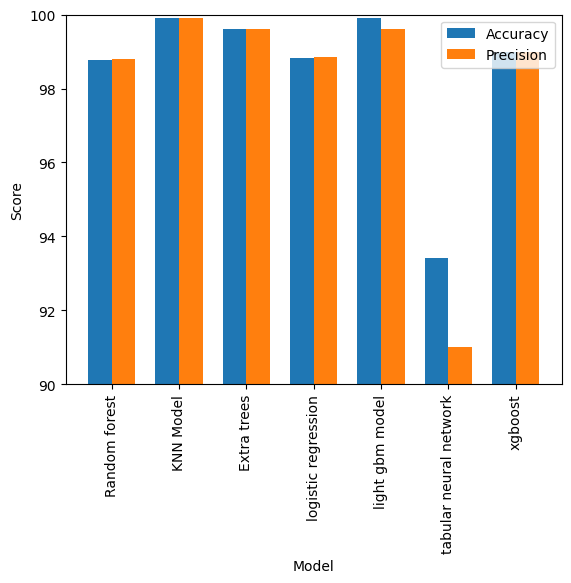

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data

model_names = ['Random forest', 'KNN Model', 'Extra trees', 'logistic regression','light gbm model','tabular neural network','xgboost']
accuracies = [98.76, 99.92, 99.60, 98.82,99.92, 93.41,99]
precision=[98.80,99.92,99.60,98.84,99.60,91,99]
# Set bar width and positions
bar_width = 0.35
bar_positions = np.arange(len(model_names))

# Create bar plot
fig, ax = plt.subplots()
rects1 = ax.bar(bar_positions - bar_width/2, accuracies, bar_width, label='Accuracy')
rects3 = ax.bar(bar_positions + bar_width/2, precision, bar_width, label='Precision')
# Add labels and legend
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_xticks(bar_positions)
ax.set_xticklabels(model_names,rotation=90)
ax.set_ylim([90,100])
ax.legend()

plt.show()